In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-10-30 00:40:42.020954: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 00:40:42.961227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 160
learning_rate = 8e-4
batch_per_file_size = 10
decay_rate = 0.95
node_embedding_size = 10
layers = [32, 16, 32, 16]

dataset = LayoutDataset(
    batch_size, train_sample_fraction=1.0,
    subset=None, build_tfrecords=False,
    batch_per_file_size=batch_per_file_size
)

2023-10-30 00:40:45.414776: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 00:40:45.521540: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 00:40:45.521819: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
mlp = LayoutMLP(
    batch_size,
    learning_rate=learning_rate,
    mask_max_len=dataset.n_config_nodes_upper_limit,
    batch_per_file_size=batch_per_file_size,
    decay_rate=decay_rate,
    node_embedding_size=node_embedding_size,
    validation_frequency=10_000,
    validations_without_improvement=5,
    layer_sizes=layers,
    loss='pairwise_hinge',
    l1_multiplier=1e-9,
    n_siblings=dataset.n_siblings
)

In [4]:
mlp.train(dataset, None)

2023-10-30 00:42:50.108345: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-10-30 00:42:50.178697: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdfeab82040 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 00:42:50.178722: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-10-30 00:42:50.208021: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 00:42:50.439760: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-10-30 00:42:50.611653: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifeti

iteration 500 training loss 4.041884 lr 0.00004
iteration 1000 training loss 4.121113 lr 0.00008
iteration 1500 training loss 3.2550762 lr 0.00012
iteration 2000 training loss 2.3828416 lr 0.00016
iteration 2500 training loss 2.8465323 lr 0.00020
iteration 3000 training loss 2.6522546 lr 0.00024
iteration 3500 training loss 3.0549662 lr 0.00028
iteration 4000 training loss 2.693486 lr 0.00032
iteration 4500 training loss 3.3104548 lr 0.00036
iteration 5000 training loss 2.6453702 lr 0.00040
iteration 5500 training loss 2.6096957 lr 0.00044
iteration 6000 training loss 2.578338 lr 0.00048
iteration 6500 training loss 2.8281984 lr 0.00052
iteration 7000 training loss 2.3595219 lr 0.00056
iteration 7500 training loss 2.390205 lr 0.00060
iteration 8000 training loss 2.481885 lr 0.00064
iteration 8500 training loss 2.3316817 lr 0.00068
iteration 9000 training loss 1.8742919 lr 0.00072
iteration 9500 training loss 2.260873 lr 0.00076
iteration 10000 training loss 2.326626 lr 0.00080
layout:n

iteration 70000 training loss 1.5394994 lr 0.00069
layout:nlp:random 0.8644086510690396
layout:nlp:default 0.4713172736807524
layout:xla:random 0.613000709878648
layout:xla:default 0.26231416736128726
epoch 0, it 70000 validation loss -0.553
iteration 70500 training loss 1.7393066 lr 0.00069
iteration 71000 training loss 1.5085752 lr 0.00069
iteration 71500 training loss 1.273157 lr 0.00069
iteration 72000 training loss 1.271448 lr 0.00069
iteration 72500 training loss 1.8319378 lr 0.00068
iteration 73000 training loss 1.7748888 lr 0.00068
iteration 73500 training loss 2.0696325 lr 0.00068
iteration 74000 training loss 1.3583924 lr 0.00068
iteration 74500 training loss 1.5598598 lr 0.00068
iteration 75000 training loss 1.962997 lr 0.00068
iteration 75500 training loss 1.7374566 lr 0.00067
iteration 76000 training loss 1.2210436 lr 0.00067
iteration 76500 training loss 1.6914753 lr 0.00067
iteration 77000 training loss 1.4174657 lr 0.00067
iteration 77500 training loss 1.4632056 lr 0.00

iteration 137000 training loss 1.1177655 lr 0.00039
iteration 137500 training loss 1.2862189 lr 0.00039
iteration 138000 training loss 1.300067 lr 0.00039
iteration 138500 training loss 1.348562 lr 0.00039
iteration 139000 training loss 1.5869216 lr 0.00038
iteration 139500 training loss 1.784258 lr 0.00038
iteration 140000 training loss 1.5268234 lr 0.00038
layout:nlp:random 0.8842984016610836
layout:nlp:default 0.4903241317257242
layout:xla:random 0.593008570917436
layout:xla:default 0.24247469179364128
epoch 0, it 140000 validation loss -0.553
iteration 140500 training loss 1.5955538 lr 0.00038
iteration 141000 training loss 1.2658855 lr 0.00037
iteration 141500 training loss 1.6601963 lr 0.00037
iteration 142000 training loss 1.1795901 lr 0.00037
iteration 142500 training loss 1.5221511 lr 0.00037
iteration 143000 training loss 1.583967 lr 0.00036
iteration 143500 training loss 1.2921379 lr 0.00036
iteration 144000 training loss 2.0973046 lr 0.00036
iteration 144500 training loss 1

iteration 203500 training loss 1.6751841 lr 0.00010
iteration 204000 training loss 1.304095 lr 0.00010
iteration 204500 training loss 1.1102561 lr 0.00010
iteration 205000 training loss 1.6683806 lr 0.00010
iteration 205500 training loss 1.1159729 lr 0.00010
iteration 206000 training loss 0.99606943 lr 0.00010
iteration 206500 training loss 1.3640665 lr 0.00009
iteration 207000 training loss 1.5487796 lr 0.00009
iteration 207500 training loss 1.4937236 lr 0.00009
iteration 208000 training loss 1.4877619 lr 0.00009
iteration 208500 training loss 1.3688169 lr 0.00009
iteration 209000 training loss 1.1535989 lr 0.00009
iteration 209500 training loss 0.62367344 lr 0.00009
iteration 210000 training loss 1.2249874 lr 0.00008
layout:nlp:random 0.8922515550075154
layout:nlp:default 0.48570964200161776
layout:xla:random 0.5998310366213397
layout:xla:default 0.2538424506175371
epoch 0, it 210000 validation loss -0.558
stopping training


## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

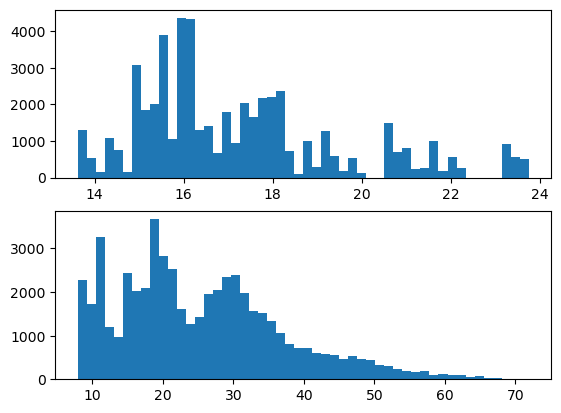

In [6]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [7]:
val_df.groupby('ID').apply(lambda x: x.min()).sort_values('prediction')

,ID,config_index,prediction,target
ID,,,,
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,53,7.927320,13.623078
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-512_A-8_batch_size_64_test',b'layout:nlp:default:small_bert_bert_en_uncase...,15,8.139754,15.479688
b'layout:nlp:random:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test',b'layout:nlp:random:small_bert_bert_en_uncased...,176,8.285208,13.625058
b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-768_A-12_batch_size_16_test',b'layout:nlp:default:small_bert_bert_en_uncase...,137,8.491564,14.891943
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-512_A-8_batch_size_64_test',b'layout:nlp:default:small_bert_bert_en_uncase...,169,9.239079,15.940157
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,2,9.449001,14.371652
b'layout:nlp:random:small_bert_bert_en_uncased_L-6_H-512_A-8_batch_size_64_test',b'layout:nlp:random:small_bert_bert_en_uncased...,23,9.511123,15.480971
b'layout:nlp:default:albert_en_xlarge_batch_size_16_test',b'layout:nlp:default:albert_en_xlarge_batch_si...,148,9.761262,17.862574
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-768_A-12_batch_size_32_test',b'layout:nlp:default:small_bert_bert_en_uncase...,197,10.088076,15.972625


Text(0.5, 1.0, "b'layout:nlp:random:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train'")

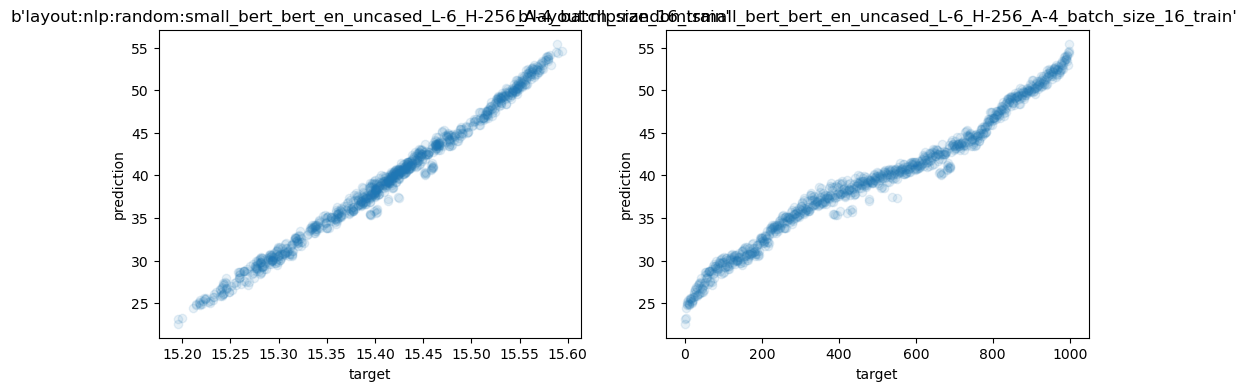

In [20]:
x_lin = np.linspace(15, 25, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(1_000)
graph_id = np.random.choice(val_df['ID'].unique())
#graph_id = b'layout:xla:default:inception_v3_batch_128_train'
#graph_id = b'layout:xla:default:unet_3d.4x4.bf16'
random_sample = val_df[val_df['ID'] == graph_id].copy()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

random_sample.sort_values('target', inplace=True)
plt.subplot(1, 2, 2)
plt.scatter(
    np.arange(len(random_sample)),
    np.clip(random_sample.prediction, a_min=-500.0, a_max=1000.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

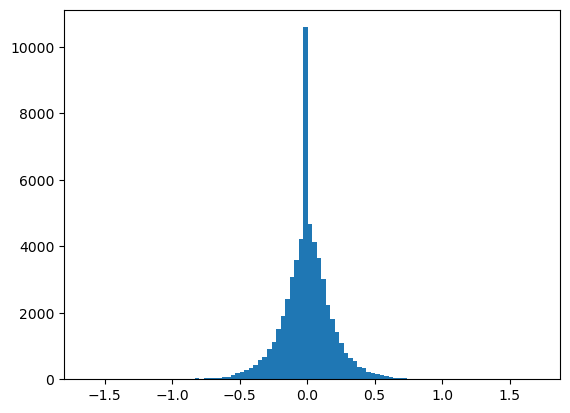

In [9]:
plt.hist(mlp.k_layer.kernel.numpy().flatten(), bins=100);

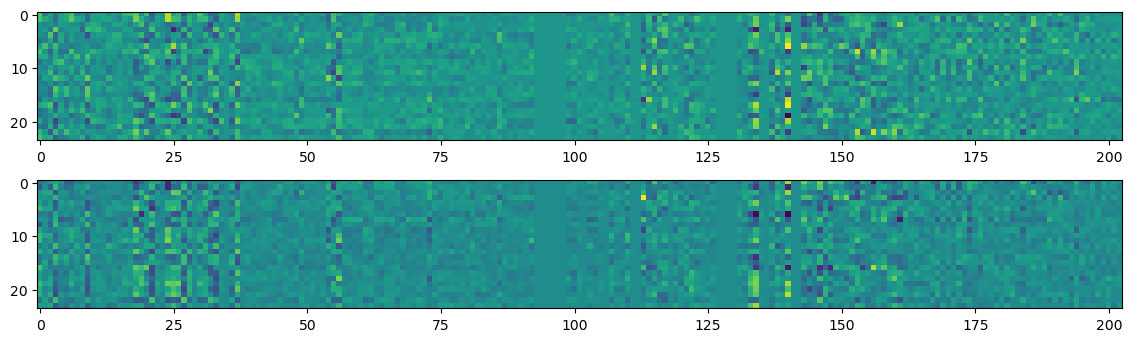

In [24]:
plt.figure(figsize=(14, 4))
kind = 1
plt.subplot(2, 1, 1)
k_vals = mlp.k_layer.kernel.numpy().reshape(203, 12, -1)[:, kind, :].T
plt.imshow(k_vals)

plt.subplot(2, 1, 2)
q_vals = mlp.q_layer.kernel.numpy().reshape(203, 12, -1)[:, kind, :].T
plt.imshow(q_vals)

00        interesting features (20)
            np.arange(21, 27),  # shape dims
            np.arange(31, 37),  # reshape/broadcast dims
            np.arange(95, 99),  # conv dims input
            np.arange(101, 105),  # conv dims kernel
20        parent output shapes (12)
32        sibling shapes (n_siblings*6)
50        physical layout (6)
56        node layout (18)
74        parent phys layout (12)
86        siblings layout (n_sibling*18)
140        parent opcodes (2)
164        sibling opcodes (n_siblings)
200        opcode (1)

In [ ]:
lens = [20, 12, 18, 6, 18, 12, 18*3, 24, 36, 12]
np.cumsum(lens)

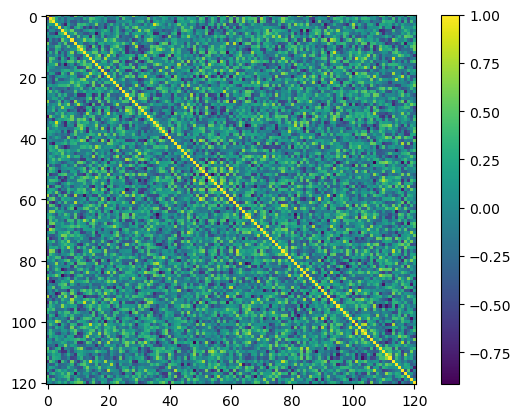

In [21]:
emb = mlp.embedding_layer_node_ops.weights[0].numpy()
emb = emb / np.expand_dims(np.linalg.norm(emb, axis=1), axis=-1)
dots = np.matmul(emb, emb.T)
plt.imshow(dots)
plt.colorbar()

In [ ]:
dots[34, 26]

In [ ]:
np.argsort(dots[26])

In [ ]:
ind = np.unravel_index(np.argsort(dots.flatten())[-122], dots.shape)
ind

In [ ]:
val_df[val_df['ID'] == b'layout:xla:default:unet_3d.4x4.bf16'].sort_values('target')

In [ ]:
for val_batch in dataset.valid_data:
    if b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy():
        print(val_batch['layout_id'])
        break

In [ ]:
np.unique(val_batch['layout_id'].numpy())

In [ ]:
b'layout:xla:default:mlperf_bert_batch_24_2x2' in val_batch['layout_id'].numpy()

In [ ]:
layout_ids = val_batch['layout_id']
config_descriptor = val_batch['node_descriptor']
valid_mask = val_batch['valid_nodes']
graph_descriptor = val_batch['graph_descriptor']

with tf.device('/cpu:0'):
    subset_info_str = tf.map_fn(
        lambda layout_id: tf.strings.reduce_join(
            tf.strings.split(layout_id, ":")[:3]),
        layout_ids
    )

subset_info = mlp.text_vectorization(subset_info_str)
subset_info = tf.expand_dims(subset_info, axis=-1)
subset_info = mlp.embedding_layer_subset_info(subset_info)
subset_info = subset_info[:, 0, :]

# for si, sn in zip(subset_info_str.numpy(), subset_info.numpy()):
#     print(si, sn)

node_operations = config_descriptor[:, :, -1]
config_descriptor = config_descriptor[:, :, :-1]
node_operations = tf.cast(node_operations, tf.int32)
# node_operations.shape == (batch_size, mask_max_len)                                                                                                                                 
node_embedding = mlp.embedding_layer_node_ops(node_operations)
# node_embedding.shape == (batch_size, mask_max_len, embed_len)
# np.unique(node_operations.numpy().flatten(), return_counts=True)

x = mlp.normalization_layer_config_nodes(config_descriptor)
normal_graph_descriptor = mlp.normalization_layer_graph_descriptor(graph_descriptor)
x = tf.concat([x, node_embedding], axis=-1)

x = mlp.dense_layer_node_1(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)                                                                                                           
x = mlp.dense_layer_node_2(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)                                                                                                           

# plt.hist(x.numpy().flatten(), bins=100);
float_mask = tf.sequence_mask(valid_mask, mlp.mask_max_len, dtype=tf.float32)
# (batch_size, n_config_nodes_upper_limit)                                                                                                                                            

float_mask = tf.expand_dims(float_mask, axis=-1)
x = x * float_mask

x = tf.reduce_sum(x, axis=1)
#plt.subplot(2, 1, 1)
#plt.hist(x.numpy().flatten(), bins=100);

x = x / tf.expand_dims(tf.cast(valid_mask, tf.float32), axis=-1)
#plt.subplot(2, 1, 2)
#plt.hist(x.numpy().flatten(), bins=100);
for i, lid, gd, nd in zip(range(96), layout_ids.numpy(), graph_descriptor.numpy(), normal_graph_descriptor.numpy()):
    if i in [19]:
        print(i, gd[80:90], nd[80:90], lid)
x = tf.concat([x, normal_graph_descriptor, subset_info], axis=-1)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_1(x)
x = mlp.relu_layer(x)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_2(x)
x = mlp.relu_layer(x)
#plt.hist(x.numpy().flatten(), bins=100);
x = mlp.dense_layer_global_3(x)
x = tf.reshape(x, (-1,))
x

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
#plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [25]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

ID
layout:nlp:default:albert_en_xlarge_batch_size_16_test                               23766;32677;34258;23806;34938;34216;40244;1104...
layout:nlp:default:bert_en_cased_L-12_H-768_A-12_batch_size_16_test                  81606;78363;65724;77560;50066;33577;50905;8174...
layout:nlp:default:bert_multi_cased_L-12_H-768_A-12_batch_size_16_train              2453;8004;9112;8119;3735;7806;22875;1201;15773...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_32_test      47080;34108;88805;52969;71418;62981;83558;2428...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-128_A-2_batch_size_64_train     9242;40701;13183;19550;42266;24983;8419;42285;...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_32_test      48984;82274;31085;43036;39144;51213;4951;54399...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H-256_A-4_batch_size_64_train     1050;31270;5537;1093;31211;21383;27282;1292;25...
layout:nlp:default:small_bert_bert_en_uncased_L-10_H

In [26]:
val_df

,ID,config_index,prediction,target
0,b'layout:xla:default:unet_3d.4x4.bf16',36,26.407894,20.629951
1,b'layout:xla:default:unet_3d.4x4.bf16',1089,29.912960,20.629925
2,b'layout:xla:default:unet_3d.4x4.bf16',1898,30.675480,20.629953
3,b'layout:xla:random:inception_v3_batch_128_train',3239,32.359806,22.179878
4,b'layout:xla:random:inception_v3_batch_128_train',1251,15.545347,21.686829
...,...,...,...,...
53476,b'layout:nlp:random:small_bert_bert_en_uncased...,8021,38.099960,16.231888
53477,b'layout:nlp:random:small_bert_bert_en_uncased...,27896,40.265018,16.234413
53478,b'layout:nlp:random:small_bert_bert_en_uncased...,25820,52.126450,16.316547
53479,b'layout:nlp:random:small_bert_bert_en_uncased...,31791,33.099220,16.190063


In [27]:
val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3])).unique()

array(['layout:xla:default', 'layout:xla:random', 'layout:nlp:random',
       'layout:nlp:default'], dtype=object)

In [28]:
def compute_layout_score_group(df):
    score, _ = kendalltau(df['prediction'], df['target'])
    return score

val_df['subset'] = val_df['ID'].map(lambda x: ':'.join(x.decode('UTF-8').split(':')[:3]))
for subset in val_df['subset'].unique():
    mean = np.mean(val_df[val_df['subset'] == subset].groupby('ID').apply(compute_layout_score_group))
    print(subset, mean)

layout:xla:default 0.2538424506175371
layout:xla:random 0.5998310366213397
layout:nlp:random 0.8922515550075154
layout:nlp:default 0.48570964200161776


In [29]:
np.mean([0.4185, 0.8167, 0.538, 0.2525])

0.506425

In [30]:
val_scores = val_df.groupby('ID').apply(compute_layout_score_group)
val_scores.sort_values()

ID
b'layout:xla:random:unet_3d.4x4.bf16'                                                  -0.044447
b'layout:xla:default:unet_3d.4x4.bf16'                                                  0.014318
b'layout:xla:default:resnet_v1_50_official_batch_128_bf16'                              0.085702
b'layout:xla:default:inception_v3_batch_128_train'                                      0.232906
b'layout:xla:default:mlperf_bert_batch_24_2x2'                                          0.307476
b'layout:nlp:default:small_bert_bert_en_uncased_L-10_H-512_A-8_batch_size_64_test'      0.316052
b'layout:xla:default:resnet50.4x4.fp16'                                                 0.325838
b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size'                              0.360849
b'layout:nlp:default:small_bert_bert_en_uncased_L-4_H-512_A-8_batch_size_32_train'      0.430528
b'layout:nlp:default:albert_en_xlarge_batch_size_16_test'                               0.430746
b'layout:nlp:default:small_

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [31]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

,ID,config_index,prediction
0,b'layout:xla:random:cd708819d3f5103afd6460b15e...,16,12.426317
1,b'layout:nlp:default:32531d07a084b319dce484f53...,11,13.735229
2,b'layout:nlp:default:71b79ca6db513e7979c3702c5...,17,13.839739
3,b'layout:nlp:default:71b79ca6db513e7979c3702c5...,2,13.566952
4,b'layout:nlp:default:71b79ca6db513e7979c3702c5...,16,16.226665
...,...,...,...
49997,b'layout:nlp:default:38524e2ff135ded55b5286407...,984,13.338329
49998,b'layout:nlp:default:38524e2ff135ded55b5286407...,983,11.430238
49999,b'layout:nlp:default:38524e2ff135ded55b5286407...,997,11.108055
50000,b'layout:nlp:default:38524e2ff135ded55b5286407...,980,18.266943


In [32]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

ID
layout:nlp:default:016ac66a44a906a695afd2228509046a    767;400;75;714;557;768;93;510;117;808;178;528;...
layout:nlp:default:171b0513d8874a427ccfa46d136fbadc    777;818;919;273;43;394;465;975;653;648;163;54;...
layout:nlp:default:23559853d9702baaaacbb0c83fd32266    75;284;215;737;993;715;449;338;93;669;108;852;...
layout:nlp:default:29886a50d55cfe77a9497bc906c76ce9    196;96;73;365;886;314;10;252;204;275;498;954;1...
layout:nlp:default:32531d07a084b319dce484f53a4cf3fc    895;313;220;638;790;234;838;224;407;737;678;63...
layout:nlp:default:38524e2ff135ded55b5286407e7af6b7    964;754;160;406;775;783;23;97;136;835;381;902;...
layout:nlp:default:3a0c5517a87df8d82fd637b83298a3ba    74;874;156;266;489;625;835;418;129;759;5;413;9...
layout:nlp:default:492c7a94d559aa4a88769142d2a68362    399;4;171;169;193;709;807;527;752;330;770;778;...
layout:nlp:default:58cc2e418c3a8a19b871e15964b534ad    743;903;583;830;352;712;49;556;834;59;402;922;...
layout:nlp:default:60880ed76de53f4d7a1b960b24f20f7d 

In [33]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('predictions/layout_none_test_prediction_10_30_13_40.csv')